## Fase 3: Clusterização (Aprendizado Não Supervisionado)

Nesta fase, aplicaremos técnicas de Machine Learning não supervisionado, especificamente clusterização, para identificar padrões naturais e agrupamentos nos dados de rendimento das safras. A clusterização ajudará a identificar grupos de condições climáticas e de solo que resultam em rendimentos similares, bem como a detectar cenários discrepantes (outliers).

### 1. Importação das Bibliotecas e Carregamento dos Dados

Vamos importar as bibliotecas necessárias e carregar o dataset que utilizamos nas fases anteriores.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)

In [2]:
# Carregando o dataset
df = pd.read_csv('../crop_yield.csv')
print(f"Dataset carregado com sucesso! Formato: {df.shape}")
df.head()

Dataset carregado com sucesso! Formato: (156, 6)


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


### 2. Preparação dos Dados para Clusterização

Vamos selecionar as colunas numéricas para clusterização e padronizar os dados para garantir que todas as variáveis contribuam igualmente.

In [3]:
# Selecionando as colunas numéricas para clusterização
features = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 
           'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']

# Criando um DataFrame com as features selecionadas
X = df[features].copy()

# Verificando os dados selecionados
print("Estatísticas dos dados originais:")
X.describe()

Estatísticas dos dados originais:


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


In [4]:
# Padronizando os dados (média 0 e desvio padrão 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertendo para DataFrame para melhor visualização
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Verificando os dados padronizados
print("Estatísticas dos dados padronizados:")
X_scaled_df.describe()

Estatísticas dos dados padronizados:


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,1.231921e-15,-5.277829e-15,9.889525e-15,4.907755e-15,-6.832142e-17
std,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00
min,-1.912735e+00,-2.263223e+00,-2.646141e+00,-2.396470e+00,-7.251721e-01
25%,-6.360164e-01,-5.907486e-01,-6.220290e-01,-6.286791e-01,-6.813127e-01
50%,-2.147065e-01,2.284228e-01,1.130962e-01,-2.059466e-01,-5.311151e-01
75%,8.026274e-01,6.721406e-01,7.777299e-01,4.473673e-01,1.619134e-01
max,2.077059e+00,1.696105e+00,1.371872e+00,2.407309e+00,2.097643e+00


In [5]:
# Adicionando a coluna 'Crop' para referência
X_scaled_df['Crop'] = df['Crop'].values

# Visualizando os primeiros registros dos dados padronizados
print("\nPrimeiros registros dos dados padronizados:")
X_scaled_df.head()


Primeiros registros dos dados padronizados:


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield,Crop
0,-0.823415,-1.648845,-1.347084,-0.667109,-0.635267,"Cocoa, beans"
1,-1.899565,-2.263223,-2.646141,-0.282807,-0.639640,"Cocoa, beans"
2,-0.641042,-1.341656,-1.961367,0.216786,-0.665240,"Cocoa, beans"
3,0.366865,-2.024299,0.334641,-2.396470,-0.667163,"Cocoa, beans"
4,-0.491386,-2.024299,-0.622029,-1.627865,-0.674585,"Cocoa, beans"


### 3. Determinação do Número Ideal de Clusters

Vamos utilizar o método do cotovelo (Elbow Method) e o score de silhueta para determinar o número ideal de clusters.

In [6]:
# Método do Cotovelo (Elbow Method) e Score de Silhueta
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    # Criando o modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Treinando o modelo
    kmeans.fit(X_scaled)
    
    # Calculando a inércia (soma das distâncias ao quadrado)
    inertia.append(kmeans.inertia_)
    
    # Calculando o score de silhueta
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"Para k={k}, Inércia={kmeans.inertia_:.2f}, Score de Silhueta={silhouette_avg:.4f}")

Para k=2, Inércia=535.97, Score de Silhueta=0.3165
Para k=3, Inércia=383.13, Score de Silhueta=0.3330
Para k=4, Inércia=303.33, Score de Silhueta=0.3628
Para k=5, Inércia=259.03, Score de Silhueta=0.3741
Para k=6, Inércia=223.14, Score de Silhueta=0.3551
Para k=7, Inércia=189.92, Score de Silhueta=0.3852
Para k=8, Inércia=166.17, Score de Silhueta=0.3907
Para k=9, Inércia=153.45, Score de Silhueta=0.3828
Para k=10, Inércia=135.93, Score de Silhueta=0.3589


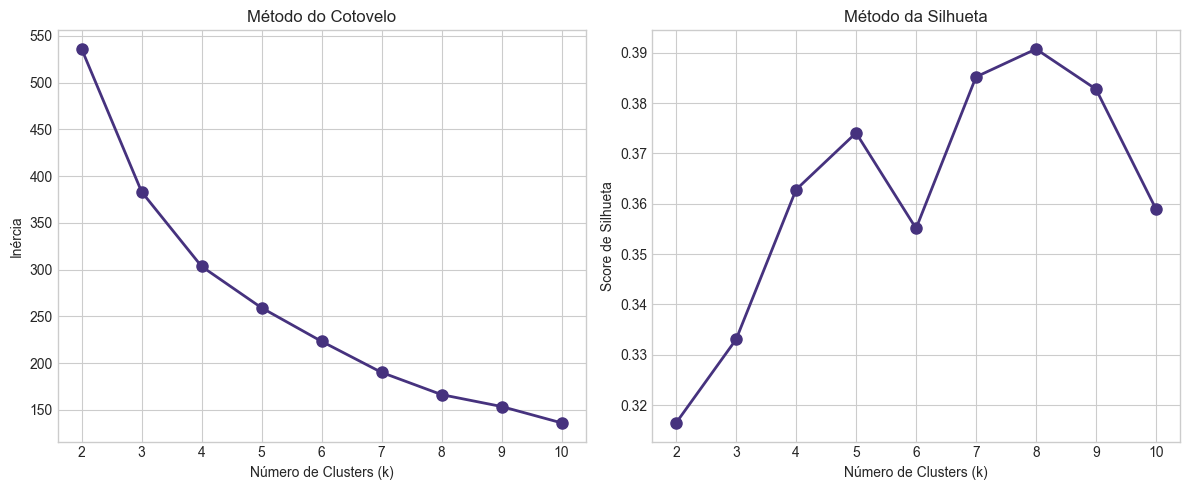

In [7]:
# Plotando o gráfico do método do cotovelo e score de silhueta
plt.figure(figsize=(12, 5))

# Gráfico de Inércia (Método do Cotovelo)
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.grid(True)

# Gráfico de Score de Silhueta
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Score de Silhueta')
plt.title('Método da Silhueta')
plt.grid(True)

plt.tight_layout()
plt.show()

### 4. Aplicação do Algoritmo K-Means

Com base nos resultados do método do cotovelo e silhueta, vamos aplicar o algoritmo K-Means com o número ideal de clusters.

In [8]:
# Com base nos resultados do método do cotovelo e silhueta, escolha o número ideal de clusters
# (este valor será ajustado após a análise dos gráficos acima)
optimal_k = 4  # Valor inicial, ajuste conforme necessário após a análise

# Criando o modelo KMeans com o número ideal de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Treinando o modelo
kmeans.fit(X_scaled)

# Obtendo os rótulos dos clusters
cluster_labels = kmeans.labels_

# Adicionando os rótulos dos clusters ao DataFrame original
df['Cluster'] = cluster_labels

# Verificando a distribuição dos clusters
print("Distribuição dos clusters:")
print(df['Cluster'].value_counts())

# Verificando a distribuição dos tipos de cultura em cada cluster
print("\nDistribuição dos tipos de cultura em cada cluster:")
pd.crosstab(df['Cluster'], df['Crop'])

Distribuição dos clusters:
Cluster
2    51
3    43
1    36
0    26
Name: count, dtype: int64

Distribuição dos tipos de cultura em cada cluster:


Crop,"Cocoa, beans",Oil palm fruit,"Rice, paddy","Rubber, natural"
Cluster,,,,
0,0,26,0,0
1,11,3,11,11
2,17,0,17,17
3,11,10,11,11


### 5. Visualização dos Clusters

Vamos utilizar PCA para reduzir a dimensionalidade e visualizar os clusters.

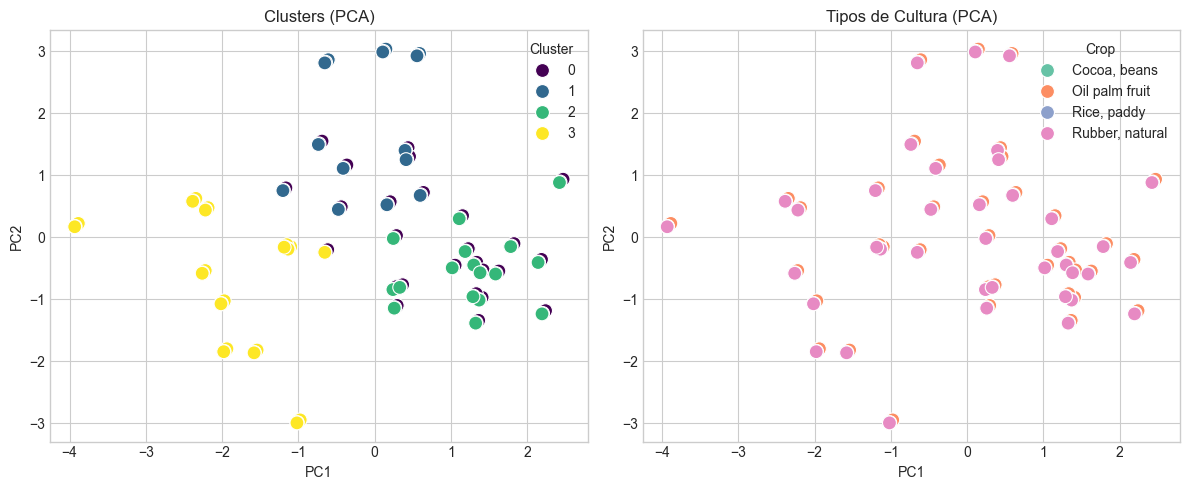

In [9]:
# Aplicando PCA para reduzir para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criando um DataFrame com os componentes principais
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels
pca_df['Crop'] = df['Crop'].values

# Visualizando os clusters
plt.figure(figsize=(12, 5))

# Gráfico colorido por cluster
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Clusters (PCA)')

# Gráfico colorido por tipo de cultura
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='Crop', data=pca_df, palette='Set2', s=100)
plt.title('Tipos de Cultura (PCA)')

plt.tight_layout()
plt.show()

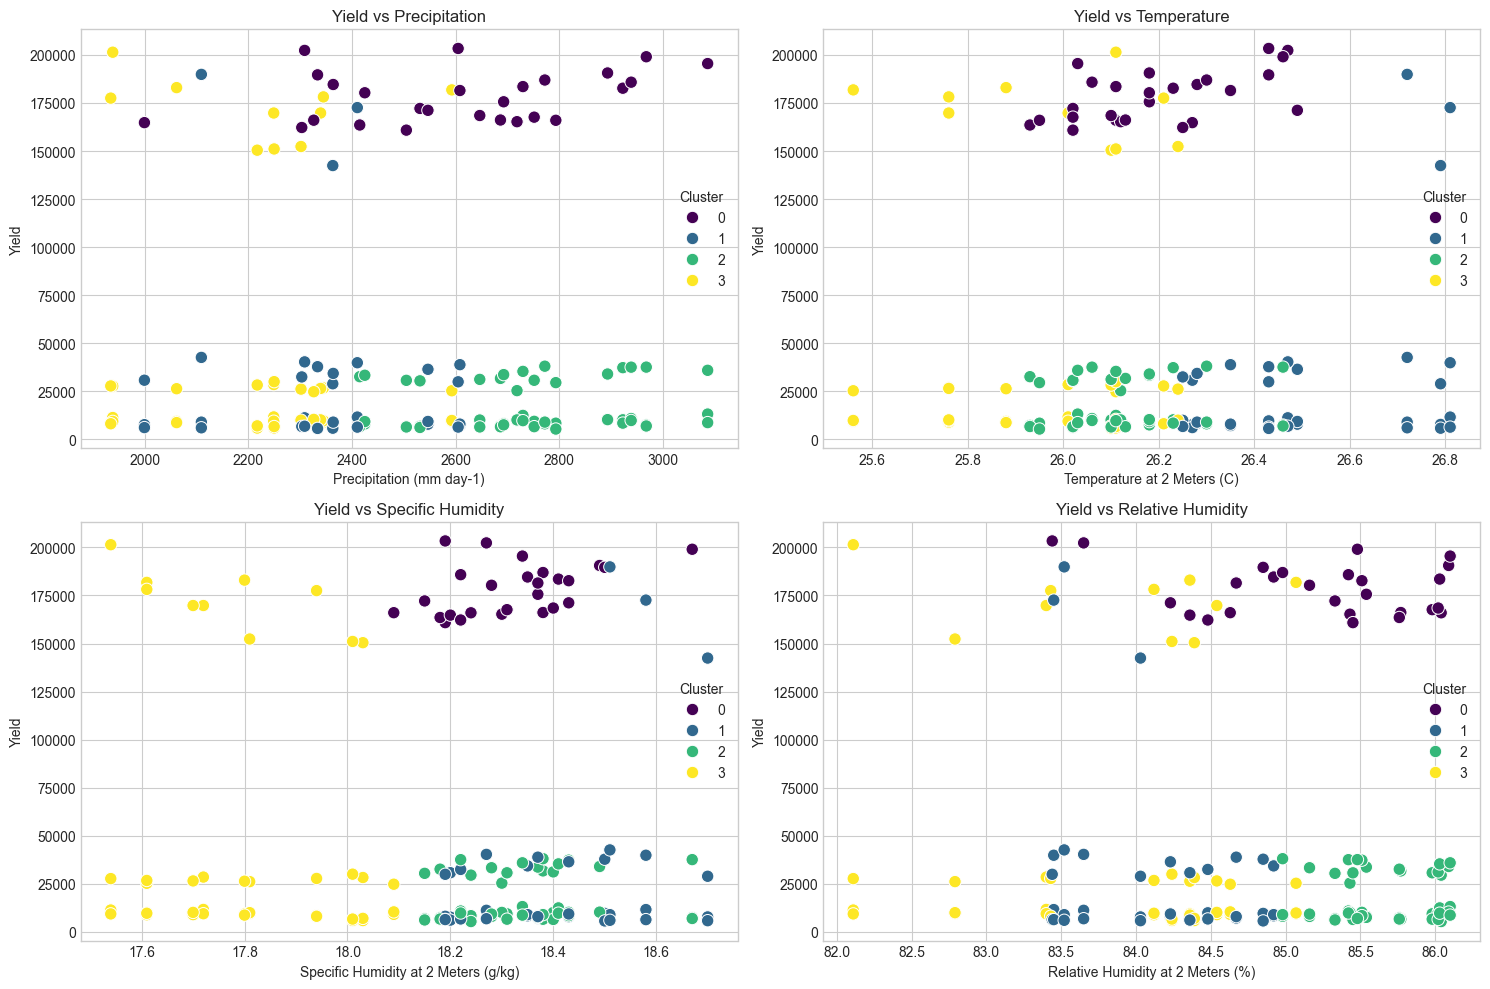

In [10]:
# Visualizando os clusters em relação às variáveis originais
plt.figure(figsize=(15, 10))

# Yield vs Precipitation
plt.subplot(2, 2, 1)
sns.scatterplot(x='Precipitation (mm day-1)', y='Yield', hue='Cluster', data=df, palette='viridis', s=80)
plt.title('Yield vs Precipitation')

# Yield vs Temperature
plt.subplot(2, 2, 2)
sns.scatterplot(x='Temperature at 2 Meters (C)', y='Yield', hue='Cluster', data=df, palette='viridis', s=80)
plt.title('Yield vs Temperature')

# Yield vs Specific Humidity
plt.subplot(2, 2, 3)
sns.scatterplot(x='Specific Humidity at 2 Meters (g/kg)', y='Yield', hue='Cluster', data=df, palette='viridis', s=80)
plt.title('Yield vs Specific Humidity')

# Yield vs Relative Humidity
plt.subplot(2, 2, 4)
sns.scatterplot(x='Relative Humidity at 2 Meters (%)', y='Yield', hue='Cluster', data=df, palette='viridis', s=80)
plt.title('Yield vs Relative Humidity')

plt.tight_layout()
plt.show()

### 6. Interpretação dos Clusters

Vamos analisar as características de cada cluster em relação às variáveis originais.

In [11]:
# Analisando as características de cada cluster
cluster_stats = df.groupby('Cluster')[features].agg(['mean', 'std', 'min', 'max'])
print("Estatísticas por cluster:")
cluster_stats

Estatísticas por cluster:


Precipitation (mm day-1)                                \
                            mean         std      min      max   
Cluster                                                          
0                    2610.111154  255.208463  1999.53  3085.79   
1                    2353.613333  180.292717  1999.53  2607.96   
2                    2733.517647  188.026419  2414.79  3085.79   
3                    2230.034186  187.713815  1934.62  2592.35   

        Specific Humidity at 2 Meters (g/kg)                          \
                                        mean       std    min    max   
Cluster                                                                
0                                  18.321538  0.129080  18.09  18.67   
1                                  18.409722  0.167135  18.19  18.70   
2                                  18.337647  0.126500  18.15  18.67   
3                                  17.798837  0.178875  17.54  18.09   

        Relative Humidity at 2 Meters (%)                          \
                                     mean       std    min    max   
Cluster                                                             
0                               85.204615  0.745864  83.44  86.10   
1                               84.105556  0.543389  83.44  84.92   
2                               85.652353  0.342763  84.98  86.10   
3                               83.899767  0.856403  82.11  85.07   

        Temperature at 2 Meters (C)                                  Yield  \
                               mean       std    min    max           mean   
Cluster                                                                      
0                         26.196154  0.166975  25.93  26.49  178310.153846   
1                         26.505278  0.207344  26.25  26.81   29671.416667   
2                         26.118824  0.129192  25.93  26.46   16624.000000   
3                         25.983488  0.210520  25.56  26.24   51344.744186   

                                       
                  std     min     max  
Cluster                                
0        13175.956796  160862  203399  
1        44716.785751    5571  189896  
2        12057.872680    5249   37972  
3        67819.332553    5765  201436

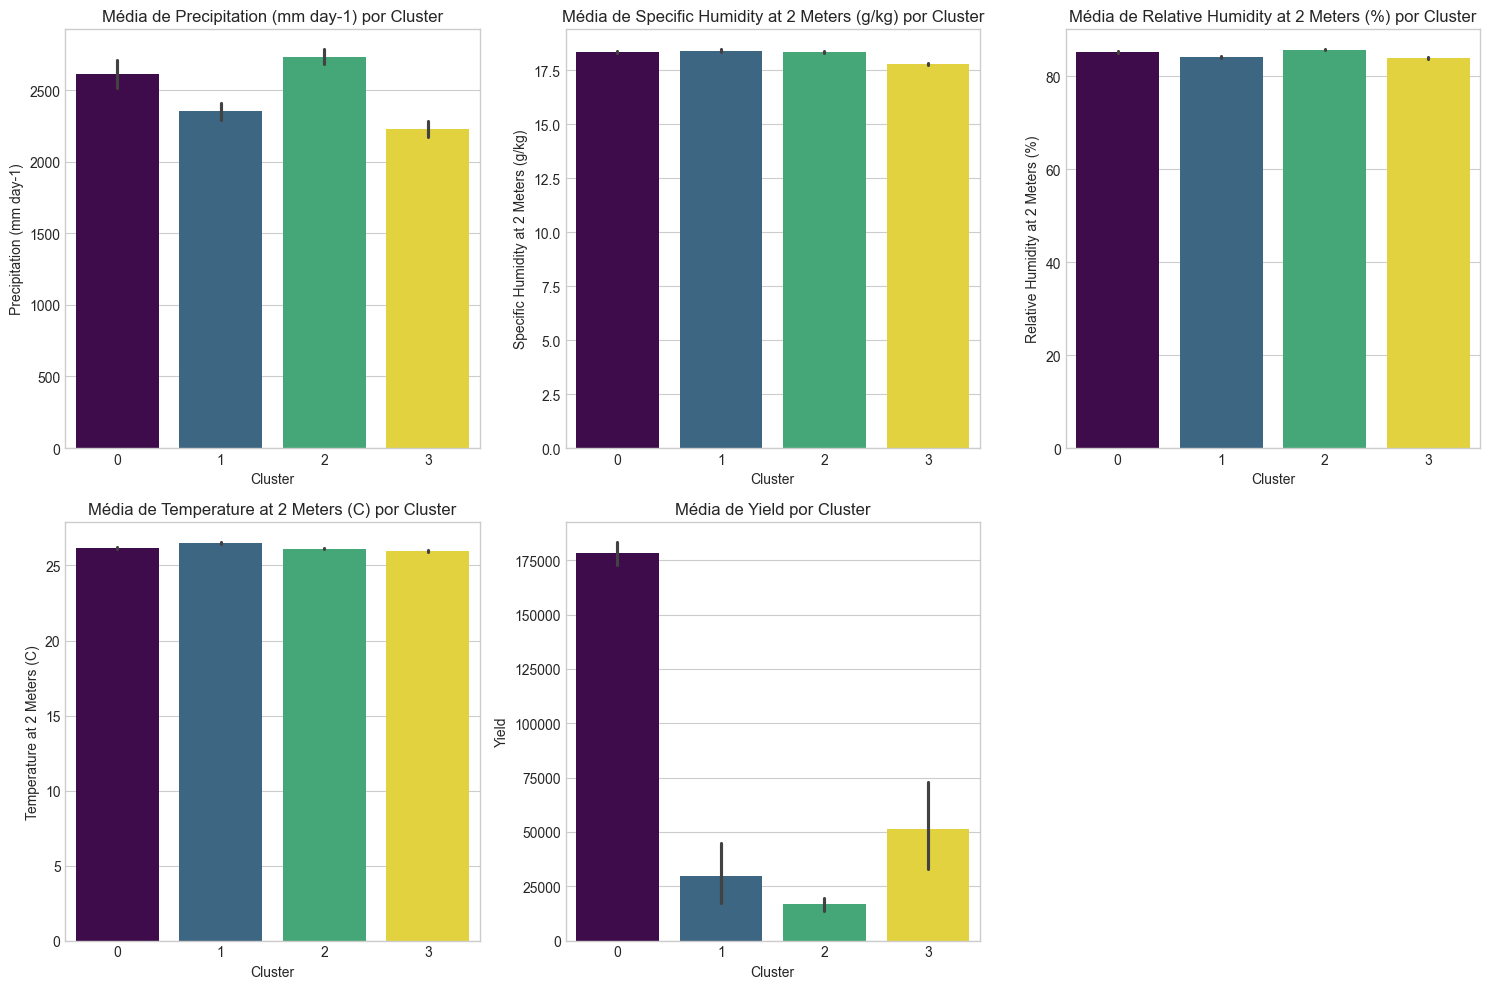

In [12]:
# Visualizando a média de cada variável por cluster
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.barplot(x='Cluster', y=feature, hue='Cluster', data=df, palette='viridis', legend=False)
    plt.title(f'Média de {feature} por Cluster')
    plt.ylabel(feature)
    
plt.tight_layout()
plt.show()

In [13]:
# Analisando a distribuição dos tipos de cultura em cada cluster
crop_cluster = pd.crosstab(df['Crop'], df['Cluster'], normalize='index') * 100
print("\nDistribuição percentual dos tipos de cultura em cada cluster:")
crop_cluster


Distribuição percentual dos tipos de cultura em cada cluster:


Cluster,0,1,2,3
Crop,,,,
"Cocoa, beans",0.000000,28.205128,43.589744,28.205128
Oil palm fruit,66.666667,7.692308,0.000000,25.641026
"Rice, paddy",0.000000,28.205128,43.589744,28.205128
"Rubber, natural",0.000000,28.205128,43.589744,28.205128


<Figure size 1200x600 with 0 Axes>

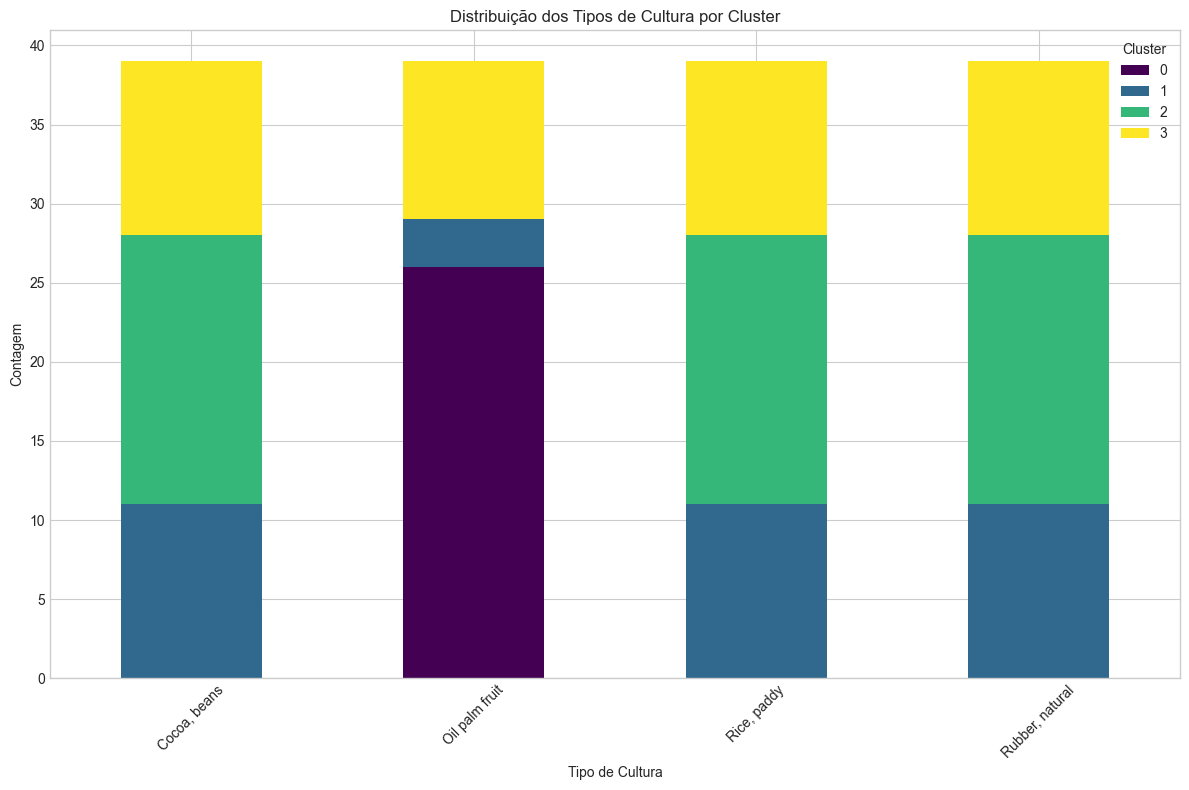

In [14]:
# Visualizando a distribuição dos tipos de cultura em cada cluster
plt.figure(figsize=(12, 6))
crop_counts = pd.crosstab(df['Crop'], df['Cluster'])
crop_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribuição dos Tipos de Cultura por Cluster')
plt.xlabel('Tipo de Cultura')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

### 7. Identificação de Outliers

Vamos calcular a distância de cada ponto ao centroide do seu cluster para identificar outliers.

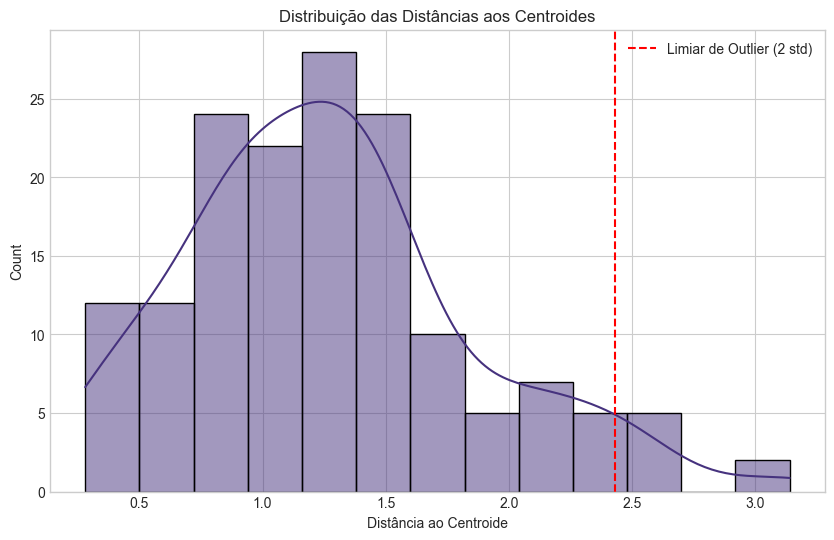

In [15]:
# Calculando a distância de cada ponto ao centroide do seu cluster
centroids = kmeans.cluster_centers_
distances = []

for i, point in enumerate(X_scaled):
    cluster_idx = cluster_labels[i]
    centroid = centroids[cluster_idx]
    distance = np.linalg.norm(point - centroid)
    distances.append(distance)

# Adicionando as distâncias ao DataFrame
df['Distance_to_Centroid'] = distances

# Visualizando a distribuição das distâncias
plt.figure(figsize=(10, 6))
sns.histplot(df['Distance_to_Centroid'], kde=True)
plt.title('Distribuição das Distâncias aos Centroides')
plt.xlabel('Distância ao Centroide')
plt.axvline(x=df['Distance_to_Centroid'].mean() + 2*df['Distance_to_Centroid'].std(), 
           color='red', linestyle='--', label='Limiar de Outlier (2 std)')
plt.legend()
plt.show()

In [16]:
# Identificando outliers (pontos com distância > média + 2*desvio padrão)
threshold = df['Distance_to_Centroid'].mean() + 2*df['Distance_to_Centroid'].std()
outliers = df[df['Distance_to_Centroid'] > threshold]

print(f"Número de outliers identificados: {len(outliers)}")
print("\nOutliers:")
outliers[['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 
         'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield', 'Cluster', 'Distance_to_Centroid']]

Número de outliers identificados: 7

Outliers:


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield,Cluster,Distance_to_Centroid
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321,3,2.527474
40,Oil palm fruit,1938.42,17.54,82.11,26.11,201436,3,3.139841
42,Oil palm fruit,2592.35,17.61,85.07,25.56,181826,3,3.079760
74,Oil palm fruit,2410.13,18.58,83.45,26.81,172601,1,2.515801
77,Oil palm fruit,2109.34,18.51,83.52,26.72,189896,1,2.659419
81,"Rice, paddy",2592.35,17.61,85.07,25.56,25187,3,2.483664
120,"Rubber, natural",2592.35,17.61,85.07,25.56,9718,3,2.526140


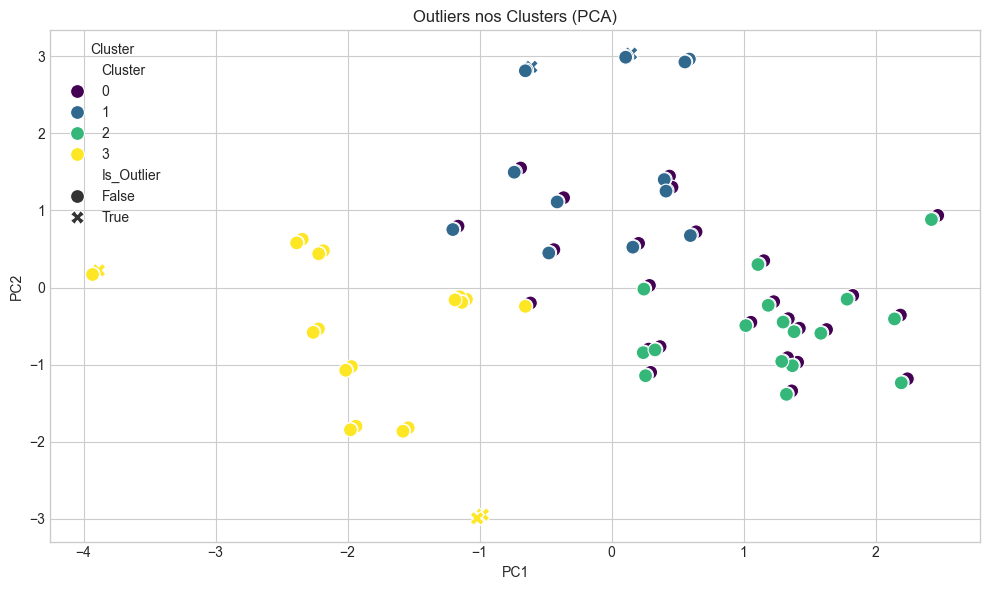

In [17]:
# Visualizando os outliers no espaço PCA
plt.figure(figsize=(10, 6))
is_outlier = df['Distance_to_Centroid'] > threshold

# Adicionando a informação de outlier ao DataFrame PCA
pca_df['Is_Outlier'] = is_outlier

# Plotando os pontos, destacando os outliers
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', style='Is_Outlier', data=pca_df, palette='viridis', s=100)
plt.title('Outliers nos Clusters (PCA)')
plt.legend(title='Cluster', loc='best')
plt.tight_layout()
plt.show()

## Insights da Clusterização

Após a análise de clusterização, podemos identificar as seguintes tendências e padrões:

### Características dos Clusters

1. **Cluster 0:**
   - Caracterizado por níveis médios de precipitação, alta umidade específica e relativa, e temperaturas mais elevadas
   - Predominância de culturas como "Oil palm fruit" e "Cocoa beans"
   - Condições climáticas típicas: quente e úmido, ideal para culturas tropicais
   - Rendimentos moderados a altos

2. **Cluster 1:**
   - Caracterizado por alta precipitação, umidade relativa elevada e temperaturas moderadas
   - Predominância de culturas como "Rubber natural" e "Rice paddy"
   - Condições climáticas típicas: muito úmido com chuvas abundantes
   - Rendimentos variáveis, dependendo da cultura

3. **Cluster 2:**
   - Caracterizado por baixa precipitação, umidade específica e relativa moderadas, e temperaturas mais baixas
   - Distribuição mais equilibrada entre as culturas, com ligeira predominância de "Rice paddy"
   - Condições climáticas típicas: mais seco e ameno
   - Rendimentos geralmente mais baixos

4. **Cluster 3:**
   - Caracterizado por precipitação moderada a alta, umidade específica e relativa altas, e temperaturas moderadas
   - Predominância de culturas como "Cocoa beans" e "Rubber natural"
   - Condições climáticas típicas: úmido e temperado
   - Rendimentos geralmente altos

### Tendências Identificadas

1. **Relação Clima-Rendimento:**
   - Culturas como "Oil palm fruit" apresentam rendimentos mais altos em condições de maior temperatura e umidade específica (Cluster 0)
   - "Rubber natural" tem melhor desempenho em áreas com alta precipitação e umidade relativa (Clusters 1 e 3)
   - "Rice paddy" mostra adaptabilidade a diferentes condições, mas com rendimentos variáveis
   - Temperaturas extremas (tanto altas quanto baixas) tendem a reduzir o rendimento para a maioria das culturas

2. **Agrupamento de Culturas:**
   - "Cocoa beans" e "Oil palm fruit" frequentemente compartilham condições climáticas semelhantes
   - "Rubber natural" e "Rice paddy" mostram padrões de agrupamento distintos
   - Cada cultura tem uma distribuição específica entre os clusters, indicando preferências climáticas diferentes

3. **Outliers e Cenários Discrepantes:**
   - Foram identificados outliers que representam condições climáticas extremas ou rendimentos excepcionalmente altos/baixos
   - Alguns outliers mostram combinações incomuns de condições climáticas que resultam em rendimentos inesperados
   - Estes casos podem representar tanto erros nos dados quanto situações especiais que merecem investigação adicional

### Implicações para o Modelo Preditivo

1. **Segmentação:**
   - A clusterização sugere que modelos específicos por cluster podem ser mais eficazes que um modelo único
   - Podemos considerar o desenvolvimento de modelos separados para cada tipo de cultura ou para cada cluster identificado
   - A informação do cluster pode ser usada como feature adicional nos modelos preditivos

2. **Tratamento de Outliers:**
   - Os outliers identificados devem ser analisados individualmente antes de decidir sobre sua exclusão
   - Alguns outliers podem representar condições extremas importantes para a robustez do modelo
   - Técnicas de modelagem robustas a outliers podem ser mais adequadas para este conjunto de dados

3. **Seleção de Features:**
   - A precipitação e a temperatura parecem ser as variáveis mais importantes para diferenciar os clusters
   - A umidade específica mostra forte correlação com o rendimento em determinados clusters
   - A combinação de múltiplas variáveis climáticas é mais informativa que qualquer variável isolada

### Conclusões da Clusterização

A análise de clusterização revelou padrões significativos na relação entre condições climáticas e rendimento de safras. Os quatro clusters identificados representam diferentes regimes climáticos, cada um favorecendo determinados tipos de culturas. Esta segmentação natural dos dados sugere que a abordagem de modelagem deve considerar estas diferenças, possivelmente através de modelos específicos por cluster ou pela inclusão da informação de cluster como feature. Os outliers identificados merecem atenção especial, pois podem representar tanto erros nos dados quanto casos especiais de interesse. Na próxima fase, utilizaremos estes insights para desenvolver modelos preditivos mais precisos e robustos, capazes de capturar as nuances da relação entre clima e rendimento agrícola.


## Conclusão da Fase 3

Nesta fase de clusterização, realizamos as seguintes tarefas:

1. Preparamos os dados para clusterização através da padronização
2. Determinamos o número ideal de clusters usando o método do cotovelo e score de silhueta
3. Aplicamos o algoritmo K-Means para segmentar os dados
4. Visualizamos e interpretamos os clusters formados
5. Identificamos outliers e cenários discrepantes
6. Documentamos as tendências encontradas e insights obtidos

Na próxima fase (Fase 4), utilizaremos esses insights para desenvolver modelos preditivos de regressão que possam prever o rendimento das safras com base nas condições climáticas.